# Preprocessing

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/datamining/tugas/data/PtaLabel2.xlsx')
# df = df.drop(['Unnamed: 0.1'], axis=1)
df.head()

,NIM,Nama,Judul,Abstrak,Kelas
0,40411100468,A.Ubaidillah S.Kom,PERANCANGAN DAN IMPLEMENTASI SISTEM DATABASE T...,Sistem informasi akademik (SIAKAD) merupaka...,RPL
1,40411100476,"M. Basith Ardianto,",APLIKASI KONTROL DAN MONITORING JARINGAN KOMPU...,Berjalannya koneksi jaringan komputer dengan l...,RPL
2,70411100070,Heri Supriyanto,SISTEM PENDUKUNG KEPUTUSAN OPTIMASI PENJADWALA...,Penjadwalan kuliah di Perguruan Tinggi me...,Komputasi
3,80411100115,Septian Rahman Hakim,SISTEM AUGMENTED REALITY ANIMASI BENDA BERGERA...,Seiring perkembangan teknologi yang ada diduni...,Komputasi
4,70411100007,Adi Chandra Laksono,Gerak Pekerja Pada Game Real Time Strategy Men...,Gerak pekerja ada pada game yang memiliki genr...,RPL


# 1. Data Exploration

In [ ]:
# count nan value
df.isnull().sum()

NIM        0
Nama       0
Judul      0
Abstrak    3
Kelas      0
dtype: int64

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isnull().sum()

NIM        0
Nama       0
Judul      0
Abstrak    0
Kelas      0
dtype: int64

In [ ]:
df.count()

NIM        795
Nama       795
Judul      795
Abstrak    795
Kelas      795
dtype: int64

In [ ]:
df.tail()

,NIM,Nama,Judul,Abstrak,Kelas
793,160411100032,Rachmad Agung Pambudi,PENERAPAN ALGORITMA LONG-SHORT TERM MEMORY UNT...,Investasi saham selama ini memiliki resiko ker...,NLP
794,160411100182,Nadila Hidayanti,SISTEM PENCARIAN TEKS AL-QURAN TERJEMAHAN BERB...,Information Retrieval (IR) merupakan pengambil...,Komputasi
795,160411100077,Afni Sakinah,KLASIFIKASI KOMPLEKSITAS VISUAL CITRA SAMPAH M...,Klasifikasi citra merupakan proses pengelompok...,Komputasi
796,160411100084,Friska Fatmawatiningrum,IDENTIFIKASI BINER ATRIBUT PEJALAN KAKI MENGGU...,Identifikasi atribut pejalan kaki merupakan sa...,NLP
797,160411100044,Dian Wibowo,DETEKSI OBJEK MANUSIA BERBASIS ONE STAGE DETEC...,Topik deteksi objek telah menarik perhatian ya...,Komputasi


In [ ]:
# Jumlah data pada masing-masing label KBK
df['Kelas'].value_counts()

Komputasi    417
RPL          254
NLP          124
Name: Kelas, dtype: int64

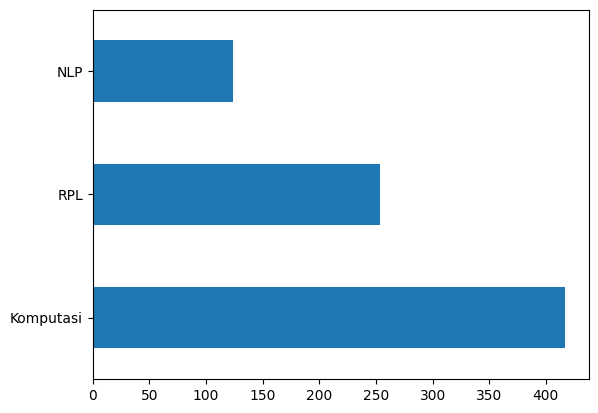

In [ ]:
import matplotlib.pyplot as plt

df['Kelas'].value_counts().plot(kind='barh')
plt.show()

# 2. Text Preprocessing

## Text Cleaning

In [ ]:
import re, string

# Text Cleaning
def cleaning(text):
    # HTML Tag Removal
    text = re.compile('<.*?>|&([a-z0-9]+|#[0-9]{1,6}|#x[0-9a-f]{1,6});').sub('', str(text))

    # Case folding
    text = text.lower()

    # Trim text
    text = text.strip()

    # Remove punctuations, karakter spesial, and spasi ganda
    text = re.compile('<.*?>').sub('', text)
    text = re.compile('[%s]' % re.escape(string.punctuation)).sub(' ', text)
    text = re.sub('\s+', ' ', text)

    # Number removal
    text = re.sub(r'\[[0-9]*\]', ' ', text)
    text = re.sub(r'[^\w\s]', '', str(text).lower().strip())
    text = re.sub(r'\d', ' ', text)
    text = re.sub(r'\s+', ' ', text)

    # Mengubah text 'nan' dengan whitespace agar nantinya dapat dihapus
    text = re.sub('nan', '', text)

    return text

In [ ]:

df['Judul'] = df['Judul'].apply(lambda x: cleaning(x))
df['Abstrak'] = df['Abstrak'].apply(lambda x: cleaning(x))

df.head()

,NIM,Nama,Judul,Abstrak,Kelas
0,40411100468,A.Ubaidillah S.Kom,perancangan dan implementasi sistem database t...,sistem informasi akademik siakad merupakan sis...,RPL
1,40411100476,"M. Basith Ardianto,",aplikasi kontrol dan monitoring jaringan kompu...,berjalannya koneksi jaringan komputer dengan l...,RPL
2,70411100070,Heri Supriyanto,sistem pendukung keputusan optimasi penjadwala...,penjadwalan kuliah di perguruan tinggi merupak...,Komputasi
3,80411100115,Septian Rahman Hakim,sistem augmented reality animasi benda bergera...,seiring perkembangan teknologi yang ada diduni...,Komputasi
4,70411100007,Adi Chandra Laksono,gerak pekerja pada game real time strategy men...,gerak pekerja ada pada game yang memiliki genr...,RPL


In [ ]:
# Checkpoint: Export Hasil Text Cleaning
df.to_csv('cleaning_data_PTA.csv')

## Remove Missing Values

In [ ]:
# Ubah empty string menjadi NaN value
df = df.replace('', np.nan)

In [ ]:
# Cek missing values
df.isnull().sum()

NIM               0
Nama              0
Judul             0
Abstrak           0
Kelas             0
judul_tokens      0
abstrak_tokens    0
dtype: int64

In [ ]:
# Remove missing values
df.dropna(inplace=True)
len(df)

792

## Remove Duplicate Values

In [ ]:
# Cek apakah terdapat duplikasi data pada kolom judul
df[df['Judul'].duplicated()]

,NIM,Nama,Judul,Abstrak,Kelas
673,120411100015,Abdul Ainur Rofik,sistem pendukung keputusan pemilihan pemain bo...,peningkatan pembinaan permai bola voli terutam...,Komputasi


In [ ]:
# Remove duplicates judul
df.drop_duplicates(subset=['Judul'], inplace=True)

# Cek apakah masih terdapat duplikasi data pada kolom judul
df[df['Judul'].duplicated()]

,NIM,Nama,Judul,Abstrak,Kelas


In [ ]:
# Cek apakah terdapat duplikasi data pada kolom abstrak
df[df['Abstrak'].duplicated()]

,NIM,Nama,Judul,Abstrak,Kelas
557,130411100028,Mohammad Muzakki,penerapan metode simple multi â attribute rati...,,Komputasi


In [ ]:
# Remove duplicates abstrak
df.drop_duplicates(subset=['Abstrak'], inplace=True)

# Cek apakah masih terdapat duplikasi data pada kolom abstrak
df[df['Abstrak'].duplicated()]

,NIM,Nama,Judul,Abstrak,Kelas


In [ ]:
# Checkpoint: Export Hasil Preprocessing
df.to_csv('preprocessed_PTA.csv')

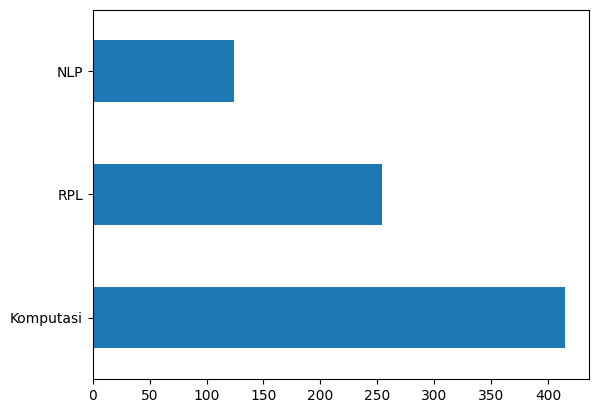

In [ ]:
# Distribusi Kelas setelah Text Preprocessing
df['Kelas'].value_counts().plot(kind='barh')
plt.show()

## Tokenization

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
from nltk.tokenize import word_tokenize


# Tokenizing Judul
df['judul_tokens'] = df['Judul'].apply(lambda x: word_tokenize(x))
df[["Judul", "judul_tokens"]].head()

,Judul,judul_tokens
0,perancangan dan implementasi sistem database t...,"[perancangan, dan, implementasi, sistem, datab..."
1,aplikasi kontrol dan monitoring jaringan kompu...,"[aplikasi, kontrol, dan, monitoring, jaringan,..."
2,sistem pendukung keputusan optimasi penjadwala...,"[sistem, pendukung, keputusan, optimasi, penja..."
3,sistem augmented reality animasi benda bergera...,"[sistem, augmented, reality, animasi, benda, b..."
4,gerak pekerja pada game real time strategy men...,"[gerak, pekerja, pada, game, real, time, strat..."


In [ ]:
# Tokenizing Abstrak
df['abstrak_tokens'] = df['Abstrak'].apply(lambda x: word_tokenize(x))
df[["Abstrak", "abstrak_tokens"]].head()

,Abstrak,abstrak_tokens
0,sistem informasi akademik siakad merupakan sis...,"[sistem, informasi, akademik, siakad, merupaka..."
1,berjalannya koneksi jaringan komputer dengan l...,"[berjalannya, koneksi, jaringan, komputer, den..."
2,penjadwalan kuliah di perguruan tinggi merupak...,"[penjadwalan, kuliah, di, perguruan, tinggi, m..."
3,seiring perkembangan teknologi yang ada diduni...,"[seiring, perkembangan, teknologi, yang, ada, ..."
4,gerak pekerja ada pada game yang memiliki genr...,"[gerak, pekerja, ada, pada, game, yang, memili..."


## Stop Words Removal

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords 
from itertools import chain

stop_words = set(chain(stopwords.words('indonesian'), stopwords.words('english')))

df['judul_tokens'] = df['judul_tokens'].apply(lambda x: [w for w in x if not w in stop_words])
df['abstrak_tokens'] = df['abstrak_tokens'].apply(lambda x: [w for w in x if not w in stop_words])

In [ ]:
df[["Judul", "judul_tokens"]].head()

,Judul,judul_tokens
0,perancangan dan implementasi sistem database t...,"[perancangan, implementasi, sistem, database, ..."
1,aplikasi kontrol dan monitoring jaringan kompu...,"[aplikasi, kontrol, monitoring, jaringan, komp..."
2,sistem pendukung keputusan optimasi penjadwala...,"[sistem, pendukung, keputusan, optimasi, penja..."
3,sistem augmented reality animasi benda bergera...,"[sistem, augmented, reality, animasi, benda, b..."
4,gerak pekerja pada game real time strategy men...,"[gerak, pekerja, game, real, time, strategy, f..."


In [ ]:
df[["Abstrak", "abstrak_tokens"]].head()

,Abstrak,abstrak_tokens
0,sistem informasi akademik siakad merupakan sis...,"[sistem, informasi, akademik, siakad, sistem, ..."
1,berjalannya koneksi jaringan komputer dengan l...,"[berjalannya, koneksi, jaringan, komputer, lan..."
2,penjadwalan kuliah di perguruan tinggi merupak...,"[penjadwalan, kuliah, perguruan, kompleks, per..."
3,seiring perkembangan teknologi yang ada diduni...,"[seiring, perkembangan, teknologi, didunia, mu..."
4,gerak pekerja ada pada game yang memiliki genr...,"[gerak, pekerja, game, memiliki, genre, rts, r..."


## Stemming

In [ ]:
!pip install sastrawi


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 KB 5.2 MB/s eta 0:00:00


In [ ]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from tqdm.auto import tqdm
tqdm.pandas()

factory = StemmerFactory()
stemmer = factory.create_stemmer()

In [ ]:
# Stemming judul
df['judul_tokens'] = df['judul_tokens'].progress_apply(lambda x: stemmer.stem(' '.join(x)).split(' '))

  0%|          | 0/793 [00:00<?, ?it/s]

In [ ]:
# Hasil stemming judul
df[["Judul", "judul_tokens"]].head()

,Judul,judul_tokens
0,perancangan dan implementasi sistem database t...,"[ancang, implementasi, sistem, database, distr..."
1,aplikasi kontrol dan monitoring jaringan kompu...,"[aplikasi, kontrol, monitoring, jaring, komput..."
2,sistem pendukung keputusan optimasi penjadwala...,"[sistem, dukung, putus, optimasi, jadwal, mata..."
3,sistem augmented reality animasi benda bergera...,"[sistem, augmented, reality, animasi, benda, g..."
4,gerak pekerja pada game real time strategy men...,"[gerak, kerja, game, real, time, strategy, fin..."


In [ ]:
# Stemming abstrak
df['abstrak_tokens'] = df['abstrak_tokens'].progress_apply(lambda x: stemmer.stem(' '.join(x)).split(' '))

  0%|          | 0/793 [00:00<?, ?it/s]

In [ ]:
# Hasil stemming abstrak
df[["Abstrak", "abstrak_tokens"]].head()

,Abstrak,abstrak_tokens
0,sistem informasi akademik siakad merupakan sis...,"[sistem, informasi, akademik, siakad, sistem, ..."
1,berjalannya koneksi jaringan komputer dengan l...,"[jalan, koneksi, jaring, komputer, lancar, gan..."
2,penjadwalan kuliah di perguruan tinggi merupak...,"[jadwal, kuliah, guru, kompleks, masalah, vari..."
3,seiring perkembangan teknologi yang ada diduni...,"[iring, kembang, teknologi, dunia, muncul, tek..."
4,gerak pekerja ada pada game yang memiliki genr...,"[gerak, kerja, game, milik, genre, rts, real, ..."


## Export Cleaned Data

In [ ]:
df

,NIM,Nama,Judul,Abstrak,Kelas,judul_tokens,abstrak_tokens
0,40411100468,A.Ubaidillah S.Kom,perancangan dan implementasi sistem database t...,sistem informasi akademik siakad merupakan sis...,RPL,"[ancang, implementasi, sistem, database, distr...","[sistem, informasi, akademik, siakad, sistem, ..."
1,40411100476,"M. Basith Ardianto,",aplikasi kontrol dan monitoring jaringan kompu...,berjalannya koneksi jaringan komputer dengan l...,RPL,"[aplikasi, kontrol, monitoring, jaring, komput...","[jalan, koneksi, jaring, komputer, lancar, gan..."
2,70411100070,Heri Supriyanto,sistem pendukung keputusan optimasi penjadwala...,penjadwalan kuliah di perguruan tinggi merupak...,Komputasi,"[sistem, dukung, putus, optimasi, jadwal, mata...","[jadwal, kuliah, guru, kompleks, masalah, vari..."
3,80411100115,Septian Rahman Hakim,sistem augmented reality animasi benda bergera...,seiring perkembangan teknologi yang ada diduni...,Komputasi,"[sistem, augmented, reality, animasi, benda, g...","[iring, kembang, teknologi, dunia, muncul, tek..."
4,70411100007,Adi Chandra Laksono,gerak pekerja pada game real time strategy men...,gerak pekerja ada pada game yang memiliki genr...,RPL,"[gerak, kerja, game, real, time, strategy, fin...","[gerak, kerja, game, milik, genre, rts, real, ..."
...,...,...,...,...,...,...,...
793,160411100032,Rachmad Agung Pambudi,penerapan algoritma long short term memory unt...,investasi saham selama ini memiliki resiko ker...,NLP,"[terap, algoritma, long, short, term, memory, ...","[investasi, saham, milik, resiko, rugi, gera, ..."
794,160411100182,Nadila Hidayanti,sistem pencarian teks al quran terjemahan berb...,information retrieval ir merupakan pengambilan...,Komputasi,"[sistem, cari, teks, al, quran, terjemah, baha...","[information, retrieval, ir, ambil, informasi,..."
795,160411100077,Afni Sakinah,klasifikasi kompleksitas visual citra sampah m...,klasifikasi citra merupakan proses pengelompok...,Komputasi,"[klasifikasi, kompleksitas, visual, citra, sam...","[klasifikasi, citra, proses, kelompok, piksel,..."
796,160411100084,Friska Fatmawatiningrum,identifikasi biner atribut pejalan kaki menggu...,identifikasi atribut pejalan kaki merupakan sa...,NLP,"[identifikasi, biner, atribut, pejal, kaki, ad...","[identifikasi, atribut, pejal, kaki, salah, te..."


In [ ]:
df['judul_tokens'] = df['judul_tokens'].apply(lambda x: ' '.join(x))
df['abstrak_tokens'] = df['abstrak_tokens'].apply(lambda x: ' '.join(x))

df.to_csv('cleaned-data-kelas.csv')

## Classification

### Load Preprocessed Data

In [ ]:
import numpy as np
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/datamining/tugas/data/cleaned-data-kelas.csv', index_col=0)
df.head()

,NIM,Nama,Judul,Abstrak,Kelas,judul_tokens,abstrak_tokens
0,40411100468,A.Ubaidillah S.Kom,perancangan dan implementasi sistem database t...,sistem informasi akademik siakad merupakan sis...,RPL,ancang implementasi sistem database distribusi...,sistem informasi akademik siakad sistem inform...
1,40411100476,"M. Basith Ardianto,",aplikasi kontrol dan monitoring jaringan kompu...,berjalannya koneksi jaringan komputer dengan l...,RPL,aplikasi kontrol monitoring jaring komputer ba...,jalan koneksi jaring komputer lancar ganggu ha...
2,70411100070,Heri Supriyanto,sistem pendukung keputusan optimasi penjadwala...,penjadwalan kuliah di perguruan tinggi merupak...,Komputasi,sistem dukung putus optimasi jadwal matakuliah...,jadwal kuliah guru kompleks masalah variabel t...
3,80411100115,Septian Rahman Hakim,sistem augmented reality animasi benda bergera...,seiring perkembangan teknologi yang ada diduni...,Komputasi,sistem augmented reality animasi benda gerak f...,iring kembang teknologi dunia muncul teknologi...
4,70411100007,Adi Chandra Laksono,gerak pekerja pada game real time strategy men...,gerak pekerja ada pada game yang memiliki genr...,RPL,gerak kerja game real time strategy finite sta...,gerak kerja game milik genre rts real time str...


In [ ]:
X = df['abstrak_tokens']
y = df['Kelas']

### Feature Extraction


> TF-IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
countvectorizer = CountVectorizer()
tfidfvectorizer = TfidfVectorizer()

count_wm = countvectorizer.fit_transform(X)
tfidf_wm = tfidfvectorizer.fit_transform(X)

In [ ]:
count_tokens = countvectorizer.get_feature_names_out()
tfidf_tokens = tfidfvectorizer.get_feature_names_out()
df_countvect = pd.DataFrame(data = count_wm.toarray(),columns = count_tokens)
df_tfidfvect = pd.DataFrame(data = tfidf_wm.toarray(),columns = tfidf_tokens)
print("Count Vectorizer\n")
df_countvect

Count Vectorizer



,aalysis,aam,abad,abadi,abai,abdi,ability,abjad,absah,absensi,...,zara,zat,zcz,zf,zona,zone,zoning,zoom,zucara,zungu
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
787,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
788,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
789,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
790,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


> PCA

In [ ]:
tfidf_wm.shape

(792, 5965)

In [ ]:
# Impor library yang dibutuhkan
from sklearn.decomposition import PCA

# Inisialisasi objek PCA dengan 3 komponen
pca = PCA(n_components=3)

# Melakukan fit transform pada data
X_pca = pca.fit_transform(tfidf_wm.toarray())

In [ ]:
X_pca.shape

(792, 3)

### Split Data

In [ ]:
from sklearn.model_selection import train_test_split
training, test = train_test_split(X_pca,test_size=0.2, random_state=1)#Nilai X training dan Nilai X testing
training_label, test_label = train_test_split(y, test_size=0.2, random_state=1)#Nilai Y training dan Nilai Y testing

K-NN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

modelKNN = KNeighborsClassifier(n_neighbors=5)
modelKNN.fit(training, training_label)

KNeighborsClassifier()

In [ ]:
test_pred = modelKNN.predict(test)
test_pred

array(['RPL', 'RPL', 'RPL', 'Komputasi', 'Komputasi', 'Komputasi',
       'Komputasi', 'RPL', 'Komputasi', 'Komputasi', 'NLP', 'Komputasi',
       'Komputasi', 'Komputasi', 'RPL', 'RPL', 'RPL', 'Komputasi',
       'Komputasi', 'Komputasi', 'RPL', 'RPL', 'RPL', 'RPL', 'Komputasi',
       'RPL', 'NLP', 'RPL', 'Komputasi', 'RPL', 'NLP', 'Komputasi',
       'Komputasi', 'Komputasi', 'Komputasi', 'RPL', 'Komputasi',
       'Komputasi', 'Komputasi', 'Komputasi', 'RPL', 'Komputasi', 'RPL',
       'Komputasi', 'Komputasi', 'RPL', 'Komputasi', 'NLP', 'RPL',
       'Komputasi', 'RPL', 'RPL', 'RPL', 'Komputasi', 'RPL', 'RPL',
       'Komputasi', 'Komputasi', 'Komputasi', 'Komputasi', 'RPL',
       'Komputasi', 'RPL', 'Komputasi', 'Komputasi', 'RPL', 'Komputasi',
       'Komputasi', 'Komputasi', 'Komputasi', 'NLP', 'Komputasi', 'RPL',
       'Komputasi', 'NLP', 'RPL', 'Komputasi', 'Komputasi', 'RPL',
       'Komputasi', 'Komputasi', 'RPL', 'RPL', 'Komputasi', 'Komputasi',
       'RPL', 'Komputasi'

In [ ]:
accuracy_score(test_label, test_pred)

0.6855345911949685

In [ ]:
print(classification_report(test_label, test_pred))

              precision    recall  f1-score   support

   Komputasi       0.72      0.78      0.75        80
         NLP       0.60      0.21      0.32        28
         RPL       0.65      0.80      0.72        51

    accuracy                           0.69       159
   macro avg       0.66      0.60      0.59       159
weighted avg       0.68      0.69      0.66       159



### Naive Bayes

In [ ]:
#Model Select
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
gaussian = GaussianNB()
gaussian.fit(training, training_label)

GaussianNB()

In [ ]:
predict = gaussian.predict(test) 
predict

array(['Komputasi', 'Komputasi', 'Komputasi', 'Komputasi', 'Komputasi',
       'Komputasi', 'Komputasi', 'RPL', 'Komputasi', 'Komputasi',
       'Komputasi', 'Komputasi', 'Komputasi', 'Komputasi', 'Komputasi',
       'Komputasi', 'RPL', 'Komputasi', 'Komputasi', 'Komputasi', 'RPL',
       'Komputasi', 'RPL', 'RPL', 'Komputasi', 'RPL', 'Komputasi', 'RPL',
       'Komputasi', 'Komputasi', 'Komputasi', 'Komputasi', 'Komputasi',
       'Komputasi', 'Komputasi', 'RPL', 'Komputasi', 'Komputasi',
       'Komputasi', 'RPL', 'RPL', 'Komputasi', 'RPL', 'Komputasi',
       'Komputasi', 'Komputasi', 'Komputasi', 'Komputasi', 'RPL',
       'Komputasi', 'Komputasi', 'Komputasi', 'RPL', 'Komputasi',
       'Komputasi', 'Komputasi', 'Komputasi', 'Komputasi', 'Komputasi',
       'Komputasi', 'Komputasi', 'Komputasi', 'RPL', 'Komputasi',
       'Komputasi', 'RPL', 'Komputasi', 'Komputasi', 'Komputasi',
       'Komputasi', 'Komputasi', 'Komputasi', 'Komputasi', 'Komputasi',
       'Komputasi', 'RPL', 'Ko

In [ ]:
accuracy_score(test_label, predict)

0.5723270440251572

In [ ]:
print(classification_report(test_label, predict))

              precision    recall  f1-score   support

   Komputasi       0.56      0.88      0.69        80
         NLP       0.00      0.00      0.00        28
         RPL       0.60      0.41      0.49        51

    accuracy                           0.57       159
   macro avg       0.39      0.43      0.39       159
weighted avg       0.48      0.57      0.50       159



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
